In [1]:
import kagglehub
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [2]:
import zipfile
import os

# Extract the uploaded ZIP file
with zipfile.ZipFile("cropped_faces.zip", 'r') as zip_ref:
    zip_ref.extractall("cropped_faces")

Found 14070 images belonging to 105 classes.
Found 3463 images belonging to 105 classes.


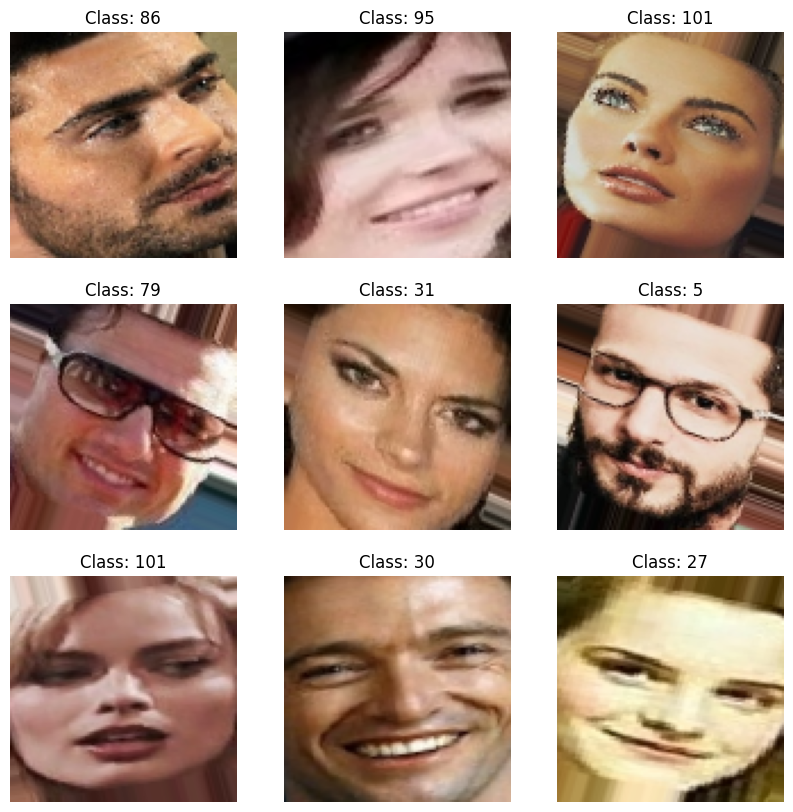

In [3]:
# Image size and other parameters
img_size = 100
batch_size = 32
validation_split = 0.2

# Define paths for dataset and parameters
data_dir = os.path.join(os.getcwd(), "cropped_faces", "105_classes_pins_dataset")  # Adjust this to the correct subdirectory if needed
img_size = 100
batch_size = 32
validation_split = 0.2

# Data Generator with Augmentation for Training and Validation
datagen = ImageDataGenerator(
    rescale=1./255,              # Normalize pixel values between 0 and 1
    validation_split=validation_split,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2
)

# Load Training and Validation Data
train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',  # Ensure 'categorical' mode to read classes correctly
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',  # Ensure 'categorical' mode to read classes correctly
    subset='validation'
)

# Display Sample Images from the Training Set
def show_samples(generator):
    x_batch, y_batch = next(generator)
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(x_batch[i])
        plt.title(f"Class: {np.argmax(y_batch[i])}")
        plt.axis('off')
    plt.show()

# Show samples from the training data
show_samples(train_gen)


In [4]:
input_shape = (img_size, img_size, 3)
num_classes = train_gen.num_classes

# Model Architecture
model = Sequential([
    Flatten(input_shape=input_shape),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# Train the Model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=50,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


440/440 ━━━━━━━━━━━━━━━━━━━━ 68s 142ms/step - accuracy: 0.0107 - loss: 6.7743 - val_accuracy: 0.0133 - val_loss: 4.6454 - learning_rate: 0.0010
Epoch 2/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 72s 127ms/step - accuracy: 0.0144 - loss: 4.6445 - val_accuracy: 0.0136 - val_loss: 4.6392 - learning_rate: 0.0010
Epoch 3/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 56s 126ms/step - accuracy: 0.0132 - loss: 4.6383 - val_accuracy: 0.0136 - val_loss: 4.6352 - learning_rate: 0.0010
Epoch 4/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 82s 127ms/step - accuracy: 0.0141 - loss: 4.6366 - val_accuracy: 0.0136 - val_loss: 4.6336 - learning_rate: 0.0010
Epoch 5/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 67s 150ms/step - accuracy: 0.0131 - loss: 4.6345 - val_accuracy: 0.0136 - val_loss: 4.6331 - learning_rate: 0.0010
Epoch 6/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 72s 126ms/step - accuracy: 0.0146 - loss: 4.6378 - val_accuracy: 0.0136 - val_loss: 4.6329 - learning_rate: 0.0010
Epoch 7/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 56s 127ms/step - accuracy: 0.0127 - loss:

In [6]:
from sklearn.metrics import classification_report

# Evaluate the Model
val_loss, val_accuracy = model.evaluate(val_gen)
print(f"Validation Accuracy: {val_accuracy:.2%}")

# Generate Classification Report
val_preds = np.argmax(model.predict(val_gen), axis=1)
val_labels = val_gen.classes
class_labels = list(val_gen.class_indices.keys())
print(classification_report(val_labels, val_preds, target_names=class_labels))


109/109 ━━━━━━━━━━━━━━━━━━━━ 11s 102ms/step - accuracy: 0.0147 - loss: 4.6351
Validation Accuracy: 1.36%
109/109 ━━━━━━━━━━━━━━━━━━━━ 18s 167ms/step
                             precision    recall  f1-score   support

          pins_Adriana Lima       0.00      0.00      0.00        42
          pins_Alex Lawther       0.00      0.00      0.00        30
    pins_Alexandra Daddario       0.00      0.00      0.00        45
          pins_Alvaro Morte       0.00      0.00      0.00        27
           pins_Amanda Crew       0.00      0.00      0.00        23
          pins_Andy Samberg       0.00      0.00      0.00        39
         pins_Anne Hathaway       0.00      0.00      0.00        40
        pins_Anthony Mackie       0.00      0.00      0.00        24
         pins_Avril Lavigne       0.00      0.00      0.00        32
           pins_Ben Affleck       0.00      0.00      0.00        25
            pins_Bill Gates       0.00      0.00      0.00        24
          pins_Bobby M

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


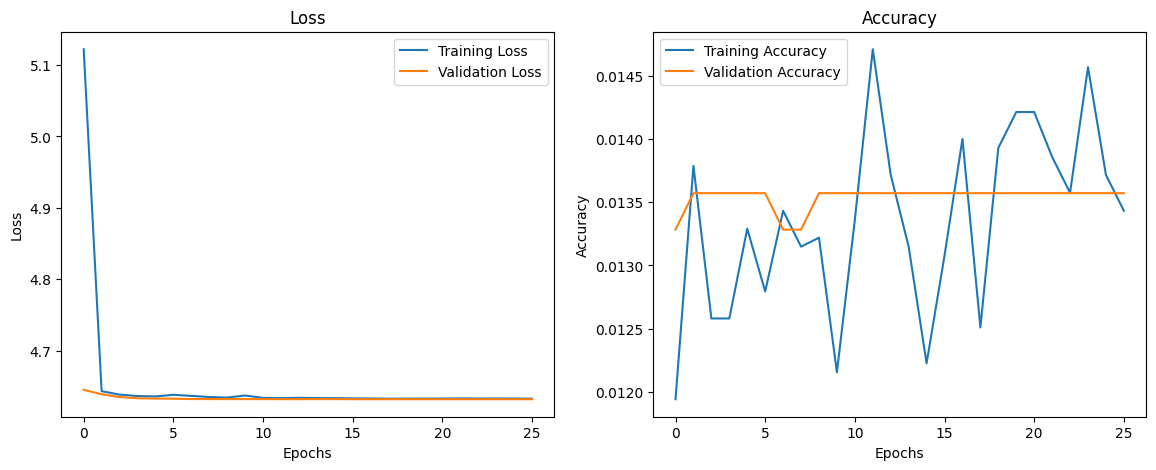

In [7]:
# Plot Training and Validation Loss and Accuracy
plt.figure(figsize=(14, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
